<a href="https://colab.research.google.com/github/JenBanks8585/DS-Unit-2-Applied-Modeling/blob/master/Jen_Banks_Walmart_project_on_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

Reading 3 dataframes

In [3]:
sales_train=pd.read_csv('/content/sales_train_validation.csv')
print(sales_train.shape)
sales_train.head()

(30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [4]:
#Contains information about the dates on which the products are sold.

calendar=pd.read_csv('calendar.csv')
print(calendar.shape)
calendar.tail(2)

(1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [5]:
#Contains information about the price of the products sold per store and date.

sell_prices=pd.read_csv('/content/sell_prices.csv')
print(sell_prices.shape)
sell_prices.head()

(6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


Taking subsets of the 3 dataframes

In [6]:
# Take subset of "calendar" df for on or before June 30, 2011 only
 
calendar['date']=pd.to_datetime(calendar['date'], infer_datetime_format=True)

calendar_subset= calendar[calendar.date<=pd.to_datetime('2011-06-30')]
print(calendar_subset.shape)
calendar_subset.tail()


(153, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
148,2011-06-26,11122,Sunday,2,6,2011,d_149,NaN,NaN,NaN,NaN,0,0,0
149,2011-06-27,11122,Monday,3,6,2011,d_150,NaN,NaN,NaN,NaN,0,0,0
150,2011-06-28,11122,Tuesday,4,6,2011,d_151,NaN,NaN,NaN,NaN,0,0,0
151,2011-06-29,11122,Wednesday,5,6,2011,d_152,NaN,NaN,NaN,NaN,0,0,0
152,2011-06-30,11122,Thursday,6,6,2011,d_153,NaN,NaN,NaN,NaN,0,0,0


In [7]:
# Take subset of "sell_prices" df for 2011-2012 only

sell_subset= sell_prices[sell_prices.wm_yr_wk<=11122]
print(sell_subset.shape)
sell_subset.tail()

(308477, 4)


,store_id,item_id,wm_yr_wk,sell_price
6840587,WI_3,FOODS_3_825,11118,4.38
6840588,WI_3,FOODS_3_825,11119,4.38
6840589,WI_3,FOODS_3_825,11120,4.38
6840590,WI_3,FOODS_3_825,11121,4.38
6840591,WI_3,FOODS_3_825,11122,4.38


In [9]:
# Take subset of "sales_train" df for d<=d_337

sale_subset= pd.DataFrame(sales_train.loc[:,'id':'d_153'])
print(sale_subset.shape)
sale_subset.tail()

(30490, 159)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,...,0,2,3,1,0,1,1,1,1,1,3,0,0,1,2,1,0,1,3,1,2,2,0,3,2,1,0,0,1,2,0,0,0,0,0,2,0,2,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,...,0,2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,2,1,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,...,2,1,1,0,0,0,0,0,2,0,2,0,2,2,0,1,1,1,2,1,3,0,2,1,1,1,1,2,1,0,1,0,2,1,0,1,2,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30489,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Merging calendar_subset and sell_subset

In [10]:
#Merge "sell_sample" and "calendar" on `wm_yr_wk`

sell_calendar=pd.merge(calendar_subset,sell_subset, on=['wm_yr_wk'])
print(sell_calendar.shape)
sell_calendar.tail(2)

(2144121, 17)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,store_id,item_id,sell_price
2144119,2011-06-30,11122,Thursday,6,6,2011,d_153,NaN,NaN,NaN,NaN,0,0,0,WI_3,FOODS_3_824,2.48
2144120,2011-06-30,11122,Thursday,6,6,2011,d_153,NaN,NaN,NaN,NaN,0,0,0,WI_3,FOODS_3_825,4.38


In [11]:
#Adding and "id" column in `sell_calendar`

sell_calendar['id']=sell_calendar['item_id']+'_'+sell_calendar['store_id']+'_validation'

print(sell_calendar.shape)
sell_calendar.head(2)

(2144121, 18)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,store_id,item_id,sell_price,id
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,CA_1,HOBBIES_1_008,0.46,HOBBIES_1_008_CA_1_validation
1,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,CA_1,HOBBIES_1_009,1.56,HOBBIES_1_009_CA_1_validation


In [0]:
sell_calendar=sell_calendar.drop(columns=['store_id', 'item_id'], axis=1)

In [13]:
#Merge "sell_calendar" and "sale_subset" on `id`

sales=pd.merge(sale_subset, sell_calendar, on=['id'])
print(sales.shape)
sales.head(2)

(2144121, 174)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,2011-06-18,11121,Saturday,1,6,2011,d_141,NaN,NaN,NaN,NaN,0,0,0,3.97
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,2011-06-19,11121,Sunday,2,6,2011,d_142,Father's day,Cultural,NaN,NaN,0,0,0,3.97


In [14]:
sales= sales.drop(columns=['id', 'item_id', 'dept_id', 'year', 'date'], axis=1)
sales.shape

(2144121, 169)

In [15]:
sales.head(3)

,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,...,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,wm_yr_wk,weekday,wday,month,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,11121,Saturday,1,6,d_141,NaN,NaN,NaN,NaN,0,0,0,3.97
1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,11121,Sunday,2,6,d_142,Father's day,Cultural,NaN,NaN,0,0,0,3.97
2,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,11121,Monday,3,6,d_143,NaN,NaN,NaN,NaN,0,0,0,3.97


In [16]:
# Randomly sample 10% of your "sales" dataframe

sale_sample = sales.sample(frac=0.20, random_state=42)
sale_sample.shape

(428824, 169)

 target = cat_id, split on month where test set =June sales

In [17]:
test=sale_sample[sale_sample['month']==6]
print(test.shape)


(90921, 169)


In [18]:
train=sale_sample[sale_sample['month']<6]
print(train.shape)
train.tail(2)

(337903, 169)


,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,...,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,wm_yr_wk,weekday,wday,month,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
750757,HOUSEHOLD,CA_4,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11113,Friday,7,4,d_91,NaN,NaN,NaN,NaN,0,0,0,7.94
884863,HOBBIES,TX_1,TX,10,0,0,0,1,8,1,3,4,2,0,0,0,0,0,2,2,0,0,1,0,1,0,3,0,4,3,0,1,0,0,0,0,0,0,0,32,...,0,0,0,4,0,6,0,7,0,0,6,0,1,1,0,0,0,0,0,6,2,0,4,0,0,0,0,11116,Saturday,1,5,d_106,NaN,NaN,NaN,NaN,0,0,1,0.54


In [0]:
#Data Wrangling

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()

    X = X.fillna('Missing')
    
    # return the wrangled dataframe
    return X


train = wrangle(train)
test = wrangle(test)

In [20]:
train.shape, test.shape

((337903, 169), (90921, 169))

In [0]:
#Assigning target/features columns

target='cat_id'

features = train.drop(columns=[target]).columns.tolist()

# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test=test[target]

In [0]:
!pip install category_encoders==2.*

In [23]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
X_test.shape

(90921, 168)

In [26]:
# Using randomforest classifier

from sklearn.ensemble import RandomForestClassifier

pipeline_rf=make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='most_frequent'),
    StandardScaler(),
    RandomForestClassifier(n_estimators=50)
)

pipeline_rf.fit(X_train, y_train)
print('Training set score', pipeline_rf.score(X_train, y_train))
print('Testing set score', pipeline_rf.score(X_test, y_test))

Training set score 1.0
Testing set score 0.9943797362545507


In [0]:
import seaborn as sns

FOODS        0.467859
HOUSEHOLD    0.354378
HOBBIES      0.177763
Name: cat_id, dtype: float64

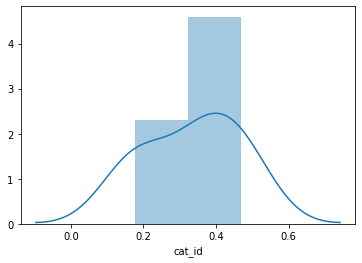

In [28]:
# The distribution has improved, but is still right-skewed
y = sale_sample['cat_id'].value_counts(normalize=True)
sns.distplot(y);
y

In [29]:
len(train[features].columns)

168

In [30]:
len(pipeline_rf.named_steps['randomforestclassifier'].feature_importances_)

326

In [31]:
#With RandomizedSearchCV on RandomforestClassifier
from sklearn.model_selection import RandomizedSearchCV

pipeline_rf_rand=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier()
)

param_distribution={
    'simpleimputer__strategy':['mean','most_frequent', 'median'],
    'randomforestclassifier__max_depth':[3,5,10],
    'randomforestclassifier__n_estimators':[10,20,30],
    'randomforestclassifier__criterion':['gini', 'entropy']
}

search=RandomizedSearchCV(
    pipeline_rf_rand,
    param_distributions=param_distribution,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    return_train_score=True,
    verbose=10,
    n_jobs=-1
)

search.fit(X_train, y_train)
print('Training set score', search.score(X_train, y_train))
print('Testing set score', search.score(X_test, y_test))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.8min finished


Training set score 0.7330683657736096
Testing set score 0.7163361599630449


In [32]:
print("Best Parameters", search.best_params_)
print("Best Accuracy score", search.best_score_)

Best Parameters {'simpleimputer__strategy': 'most_frequent', 'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini'}
Best Accuracy score 0.7347049117600138


In [33]:
# Applying the given hyperparameters

classifier=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy= 'median'),
    RandomForestClassifier(criterion='gini',
                           max_depth= 10,                           
                           n_estimators=10)
)

classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))

score =classifier.score(X_test, y_test)
print(score)

0.7343083666022497
0.7137514985536895


In [34]:
len(X_train.columns)

168

##Plotting Default feature importances 

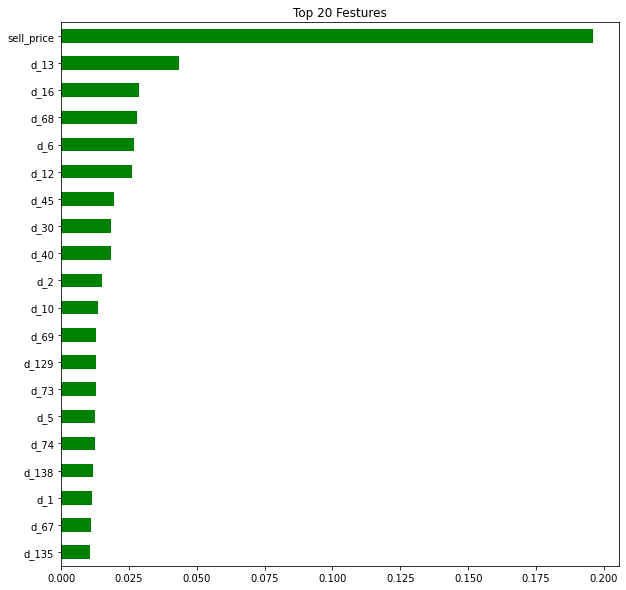

In [36]:

%matplotlib inline
import matplotlib.pyplot as plt

rf=classifier.named_steps['randomforestclassifier']
importances= pd.Series(rf.feature_importances_, train[features].columns)

# Plot top n feature importances
n= 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} Festures')
importances.sort_values()[-n:].plot.barh(color='green');

Trying Drop-Column importance


In [37]:
X_train2=X_train.copy()
X_test2=X_test.copy()

column='sell_price'

pipeline=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy= 'median'),
    RandomForestClassifier(criterion='gini',
                           max_depth= 10,                           
                           n_estimators=10)
)

pipeline.fit(X_train2.drop(columns=column), y_train)
print('Train score without selling_price', pipeline.score(X_train2.drop(columns=column), y_train))

score_without =pipeline.score(X_test2.drop(columns=column), y_test)
print('test score without selling_price', score_without)
print('Drop-column importance for', column, score-score_without)

Train score without selling_price 0.6932403677978591
test score without selling_price 0.6733097964166694
Drop-column importance for sell_price 0.04044170213702003


In [38]:
len(X_train2.columns)

168

Permutation Importance

In [39]:
#BEFORE: Sequence of the feature before permuting

feature='sell_price'
X_test[feature].head()

1642085    5.47
838197     1.98
1940221    7.44
259820     1.97
1287214    2.98
Name: sell_price, dtype: float64

In [40]:
#BEFORE: Distribution of the feature
X_test[feature].value_counts()

1.98     4493
2.98     3016
1.97     2618
3.97     2394
1.00     2140
         ... 
13.72       1
12.84       1
1.46        1
15.12       1
10.00       1
Name: sell_price, Length: 451, dtype: int64

In [0]:
#Permute

X_test_permuted= X_test.copy()
X_test_permuted[feature]=np.random.permutation(X_test[feature])

In [42]:
len(X_test_permuted.columns)

168

In [43]:
X_test_permuted[feature].shape

(90921,)

In [44]:
#AFTER: Sequence
X_test_permuted[feature].value_counts()

1.98     4493
2.98     3016
1.97     2618
3.97     2394
1.00     2140
         ... 
10.00       1
13.72       1
1.46        1
12.17       1
1.67        1
Name: sell_price, Length: 451, dtype: int64

In [45]:
#len(X_test_permuted)
len(y_test)

90921

In [46]:
X_test_permuted.shape

(90921, 168)

In [47]:
#Get permutation importance
#No need to refit

score_permuted=classifier.score(X_test_permuted, y_test)

print(f'Test set accuracy with {feature}:{score}')
print(f'Test set accuracy score with {feature} permuted:{score_permuted}')
print(f'Permutation importance: {score-score_permuted}')

Test set accuracy with sell_price:0.7137514985536895
Test set accuracy score with sell_price permuted:0.6259170048723617
Permutation importance: 0.08783449368132779


In [48]:
# Trying out a different feature

feature= 'd_37'
X_test_permuted=X_test.copy()
X_test[feature]=np.random.permutation(X_test[feature])
score_permuted=classifier.score(X_test_permuted, y_test)

print(f'Test set accuracy with {feature}:{score}')
print(f'Test set accuracy score with {feature} permuted:{score_permuted}')
print(f'Permutation importance: {score-score_permuted}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Test set accuracy with d_37:0.7137514985536895
Test set accuracy score with d_37 permuted:0.7137514985536895
Permutation importance: 0.0


#With eli5 library

In [49]:
transformers=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed=transformers.fit_transform(X_train)
X_test_transformed=transformers.fit_transform(X_test)

model=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
!pip install eli5

In [51]:
import eli5
from eli5.sklearn import PermutationImportance

permuter=PermutationImportance(
    model, 
    scoring='accuracy',
    n_iter=5,
    random_state=42    
)

permuter.fit(X_test_transformed, y_test)

permuter.feature_importances_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


array([ 9.26078684e-04,  1.14824958e-03,  1.83675938e-03,  5.36729688e-04,
        6.04920755e-04,  2.44168014e-04,  3.03560234e-04,  1.87657417e-02,
        9.89870327e-05,  4.59739774e-04,  1.83016025e-03,  1.84775794e-04,
        3.56353318e-04,  2.11612279e-03,  1.29782998e-04,  6.59913551e-05,
        8.77685023e-04,  7.72098855e-04,  4.11346114e-04,  2.00173777e-04,
        5.49927959e-05,  1.75976947e-05, -6.15919315e-05, -1.75976947e-05,
        2.67484959e-03,  2.11172336e-04,  9.89870327e-05,  1.31982710e-04,
       -6.59913551e-06,  1.18784439e-04,  1.64978388e-04,  2.68364844e-04,
        1.14385016e-04,  4.17945249e-05,  3.95948131e-05, -4.39942368e-06,
        8.13893380e-05,  4.94935163e-04, -7.69899143e-05, -2.22044605e-17,
        9.01881853e-05,  1.53979829e-05,  1.51780117e-04,  4.66338910e-04,
        1.54419771e-03,  1.73777235e-04,  2.47027639e-03, -1.97974065e-05,
       -2.19971184e-06, -1.75976947e-05,  5.05933723e-05,  8.79884735e-05,
        1.07785880e-04,  

In [52]:
feature_names=X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

d_37         -0.000077
d_21         -0.000062
d_119        -0.000059
d_104        -0.000055
d_115        -0.000051
                ...   
d_12          0.002116
d_45          0.002470
d_23          0.002675
d_6           0.018766
sell_price    0.141028
Length: 168, dtype: float64

In [53]:
#Display

eli5.show_weights(
    permuter,
    top=50,      #no limit of how many features to show
    feature_names=feature_names,   #should be a list
)

Weight,Feature
0.1410 ± 0.0025,sell_price
0.0188 ± 0.0006,d_6
0.0027 ± 0.0002,d_23
0.0025 ± 0.0003,d_45
0.0021 ± 0.0002,d_12
0.0019 ± 0.0002,d_135
0.0018 ± 0.0002,d_1
0.0018 ± 0.0003,d_9
0.0015 ± 0.0001,d_43
0.0011 ± 0.0001,state_id


In [54]:
# Setting constraints for feature importances

minimum_importance = 0.0002
mask= permuter.feature_importances_>minimum_importance
features= X_train.columns[mask]
X_train_subset= X_train[features]
X_train_subset

,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_8,d_9,d_11,d_12,d_15,d_16,d_17,d_18,d_23,d_24,d_30,d_36,d_42,d_43,d_45,d_65,d_67,d_68,d_69,d_73,d_128,d_135,d_138,d_146,sell_price
1037731,TX_1,TX,0,2,0,0,5,3,1,4,2,3,1,3,5,0,0,0,1,0,0,4,3,2,0,1,0,2,0,6,3,1,1.98
1528326,TX_3,TX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,3.58
2081941,WI_3,WI,1,0,0,0,1,1,0,0,5,2,0,1,3,1,2,1,2,2,0,2,4,6,1,1,0,0,0,0,5,0,2.98
57722,CA_1,CA,0,3,0,1,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,9.87
1195598,TX_2,TX,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929477,TX_1,TX,0,0,0,2,0,1,1,5,2,0,3,3,1,1,4,2,0,0,1,2,2,6,0,1,3,2,3,3,3,0,14.97
1627106,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,2,1,7.87
886094,TX_1,TX,0,2,0,2,0,0,2,1,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,13.00
750757,CA_4,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7.94


In [55]:
print('Shape before removing features', X_train.shape)
print('Shape after removing features',X_train_subset.shape)

Shape before removing features (337903, 168)
Shape after removing features (337903, 33)


In [56]:
# Passing the subset dataset with lesser features into the pipeline

X_test_subset=X_test[features]

pipeline=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

#Fit on train, score on test set

pipeline.fit(X_train_subset, y_train)
print('Validation Accuracy', pipeline.score(X_test_subset, y_test))

Validation Accuracy 0.9920590402657252


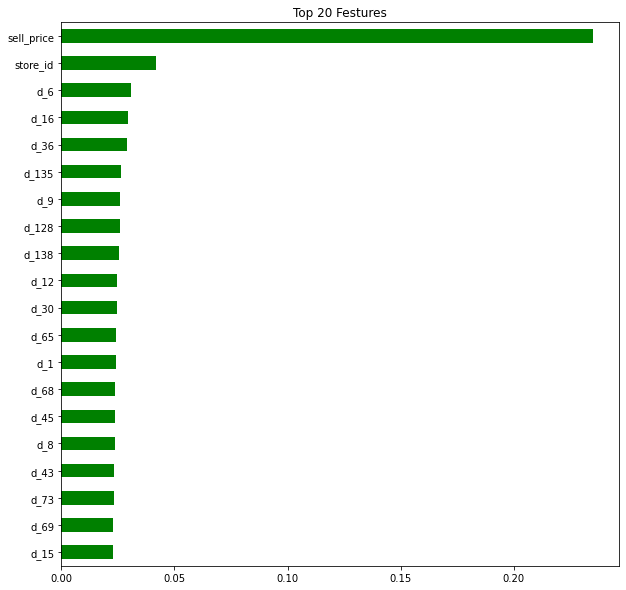

In [57]:

%matplotlib inline
import matplotlib.pyplot as plt

rf=pipeline.named_steps['randomforestclassifier']
importances= pd.Series(rf.feature_importances_, X_train_subset[features].columns)

# Plot top n feature importances
n= 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} Festures')
importances.sort_values()[-n:].plot.barh(color='green');

### XGBOOST

In [0]:
from xgboost import XGBClassifier

In [0]:
pipeline_xgb=make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

In [64]:
pipeline_xgb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['store_id', 'state_id', 'weekday', 'd',
                                      'event_name_1', 'event_type_1',
                                      'event_name_2', 'event_type_2'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'store_id',
                                          'data_type': dtype('O'),
                                          'mapping': TX_1     1
TX_3     2
WI_3     3
CA_1     4
TX_2     5
CA_3     6
WI_2     7
CA_4     8
CA_2     9
WI_1    10
NaN     -2
dty...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
   

In [61]:
from sklearn.metrics import accuracy_score

y_pred=pipeline_xgb.predict(X_test)
print('Validation Accuracy', accuracy_score(y_test,y_pred))

Validation Accuracy 0.7105179221521981


In [62]:
# Running XGB on reduced features
pipeline_xgb=make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline_xgb.fit(X_train_subset, y_train)
y_pred2=pipeline_xgb.predict(X_test_subset)
print('Validation Accuracy', accuracy_score(y_test,y_pred2))

Validation Accuracy 0.7046556901045963


##Early Stopping to avoid overfitting

In [139]:
#fit_transform on train, transform on test

encoder= ce.OrdinalEncoder()
X_train_encoded=encoder.fit_transform(X_train)
X_test_encoded=encoder.transform(X_test)

model=XGBClassifier(
    n_estimators= 1000,  # depends on early stopping
    max_depth=7,         #try deeper trees for high cardinality
    learning_rate= 0.5,
    n_jobs=-1
)

eval_set= [(X_train_encoded, y_train),
           (X_test_encoded, y_test)]

model.fit(X_train_encoded, y_train,
          eval_set=eval_set,
          eval_metric='merror',
          early_stopping_rounds=1)   # stop if score has not improved in 50 rounds


[0]	validation_0-merror:0.265307	validation_1-merror:0.28296
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 1 rounds.
[1]	validation_0-merror:0.249921	validation_1-merror:0.269597
[2]	validation_0-merror:0.232688	validation_1-merror:0.258158
[3]	validation_0-merror:0.219823	validation_1-merror:0.2454
[4]	validation_0-merror:0.203715	validation_1-merror:0.226922
[5]	validation_0-merror:0.192336	validation_1-merror:0.216793
[6]	validation_0-merror:0.183778	validation_1-merror:0.207807
[7]	validation_0-merror:0.17128	validation_1-merror:0.197468
[8]	validation_0-merror:0.158486	validation_1-merror:0.185997
[9]	validation_0-merror:0.154	validation_1-merror:0.180453
[10]	validation_0-merror:0.145225	validation_1-merror:0.172479
[11]	validation_0-merror:0.136968	validation_1-merror:0.163945
[12]	validation_0-merror:0.132526	validation_1-merror:0.158236
[13]	validation_0-merror:0.128851	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
dir(model)

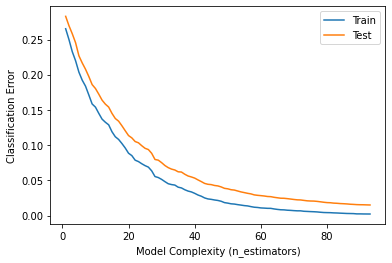

In [73]:
results= model.evals_result()
train_error= results['validation_0']['merror']
test_error= results['validation_1']['merror']

epoch=range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train' )
plt.plot(epoch, test_error, label='Test')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
#plt.ylim((0,0.002))  # Zooming in
plt.legend();


### Partial Dependence Plots

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=72

In [0]:
!pip install pdpbox

In [0]:
%matplotlib inline 

from pdpbox.pdp import  pdp_isolate, pdp_plot

PDPplot using 10 grids

In [88]:
feature='sell_price'

isolated= pdp_isolate(
    model=classifier,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature
)

isolated

In [0]:
dir(isolated)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


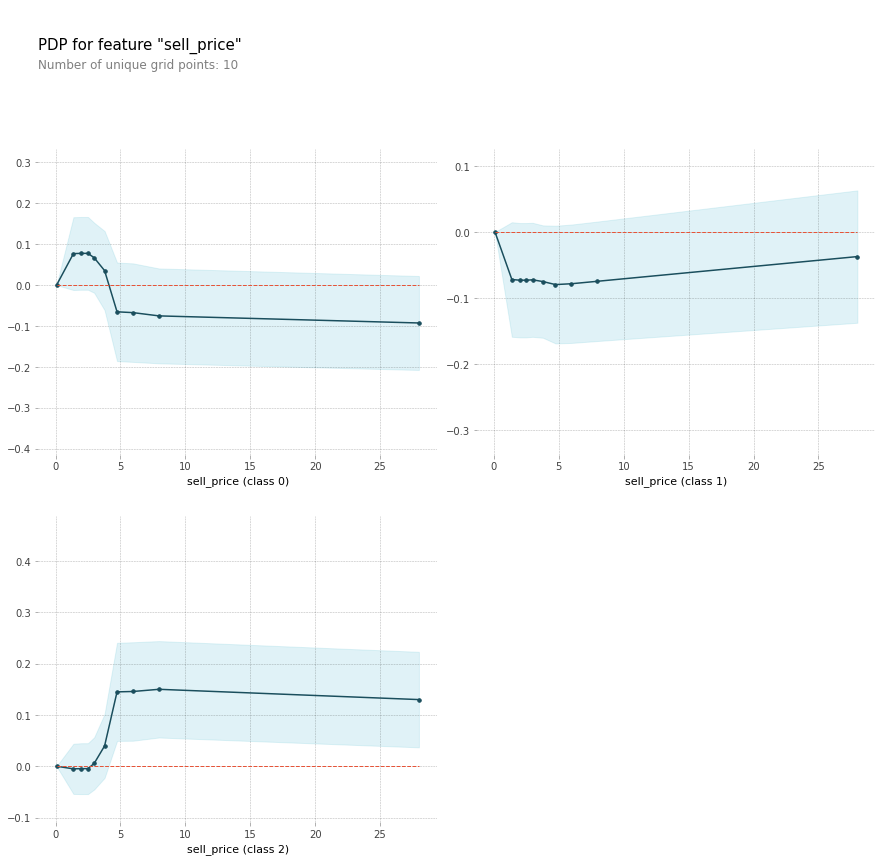

In [94]:
pdp_plot(isolated, feature_name=feature);

(<Figure size 1080x1080 with 4 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7f9da0b7f278>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f9da0bf06d8>})

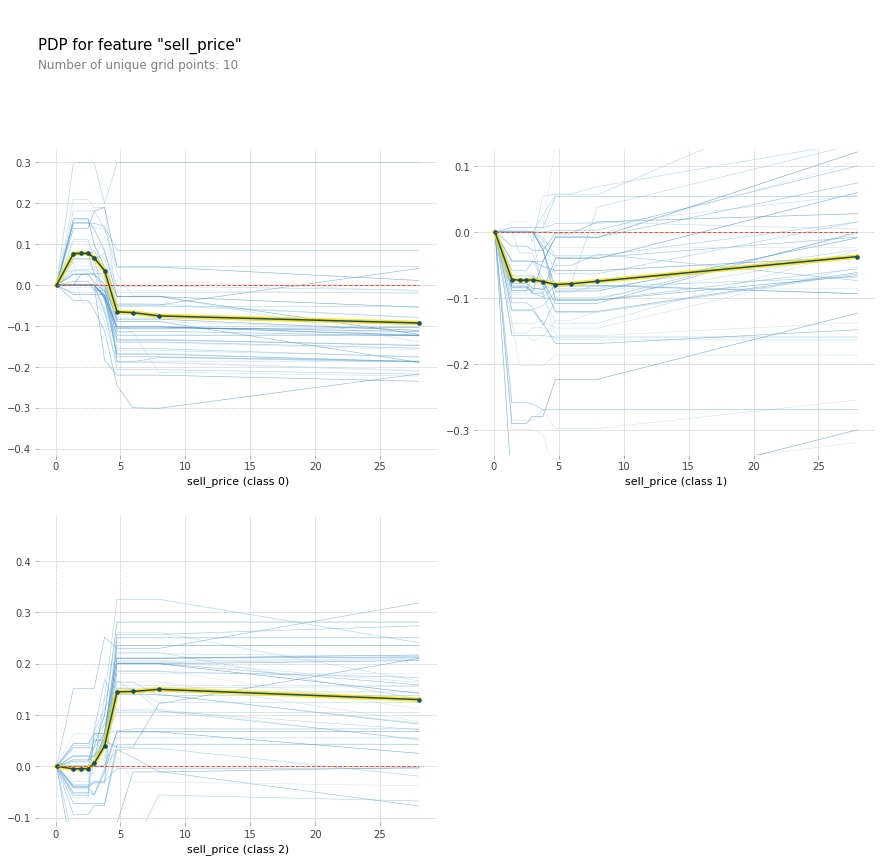

In [97]:
# plot PDP with 100 ICE curves

pdp_plot(isolated, feature_name=feature, plot_lines=True,
         frac_to_plot=0.0005)

PDPplot using 50 grids

In [99]:
feature='sell_price'

isolated2= pdp_isolate(
    model=classifier,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature,
    num_grid_points=50
)

isolated2

(<Figure size 1080x1080 with 4 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7f9da086a748>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f9def8a1828>})

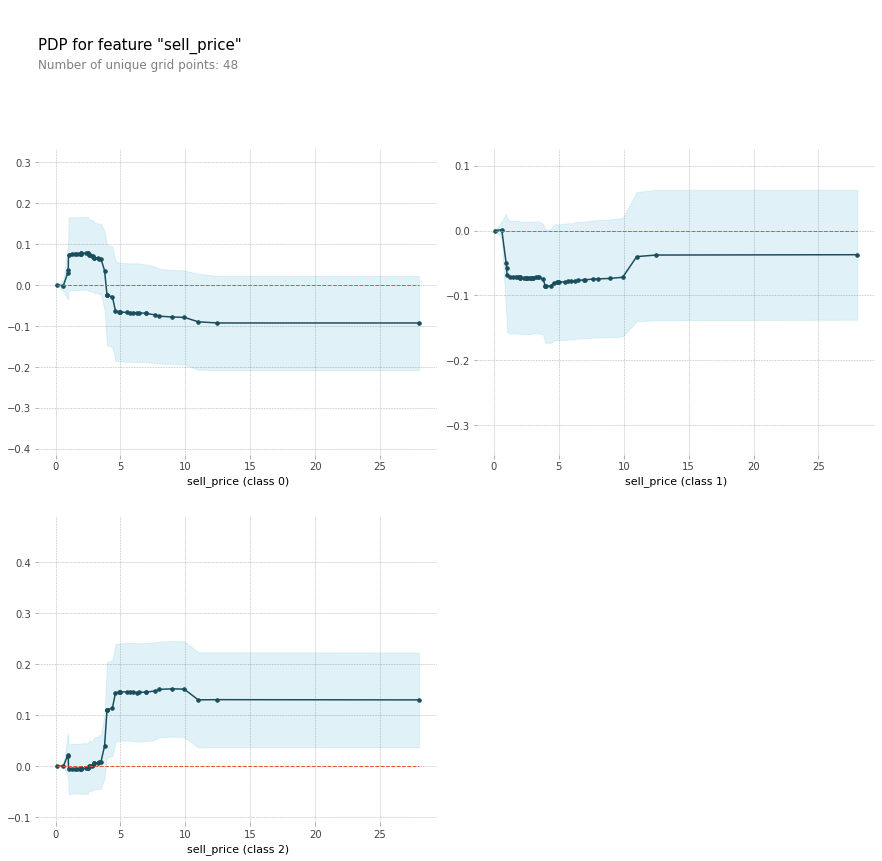

In [100]:

pdp_plot(isolated2, feature_name=feature)

(<Figure size 1080x1080 with 4 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7f9da0779630>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f9da07ed0f0>})

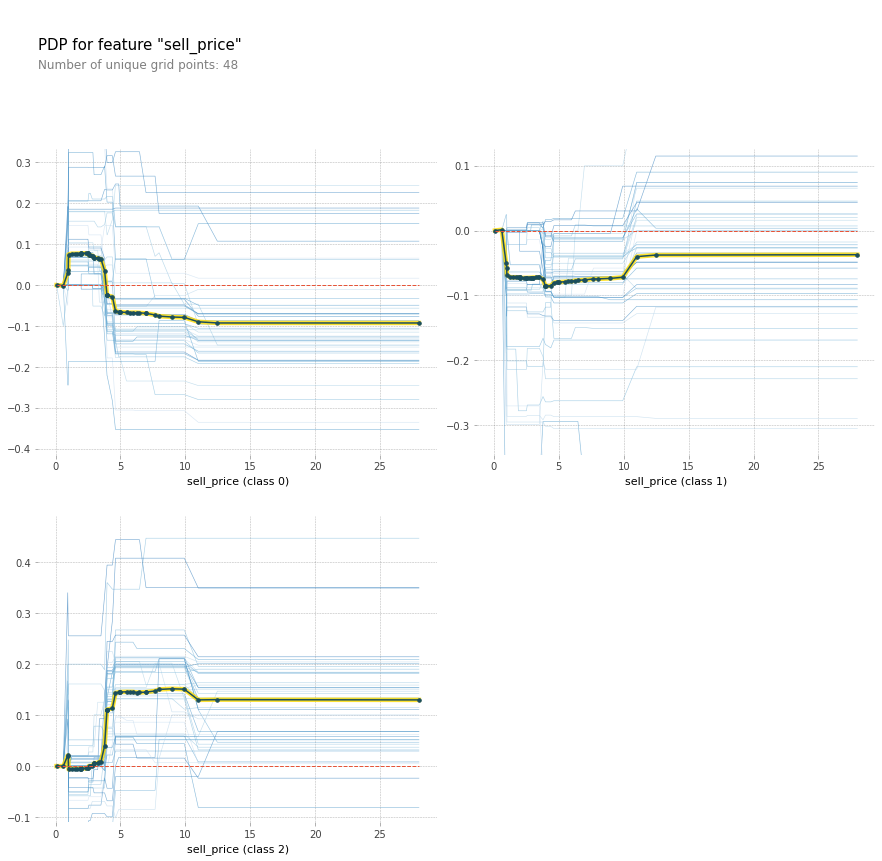

In [101]:

pdp_plot(isolated2, feature_name=feature, plot_lines=True,
         frac_to_plot=0.0005)

###PDP Plot with 2 features

In [0]:
from pdpbox.pdp import  pdp_interact, pdp_interact_plot

In [0]:
features=['d_6', 'sell_price']

interactions= pdp_interact(
    model=classifier,
    dataset=X_test,
    model_features=X_test.columns,
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


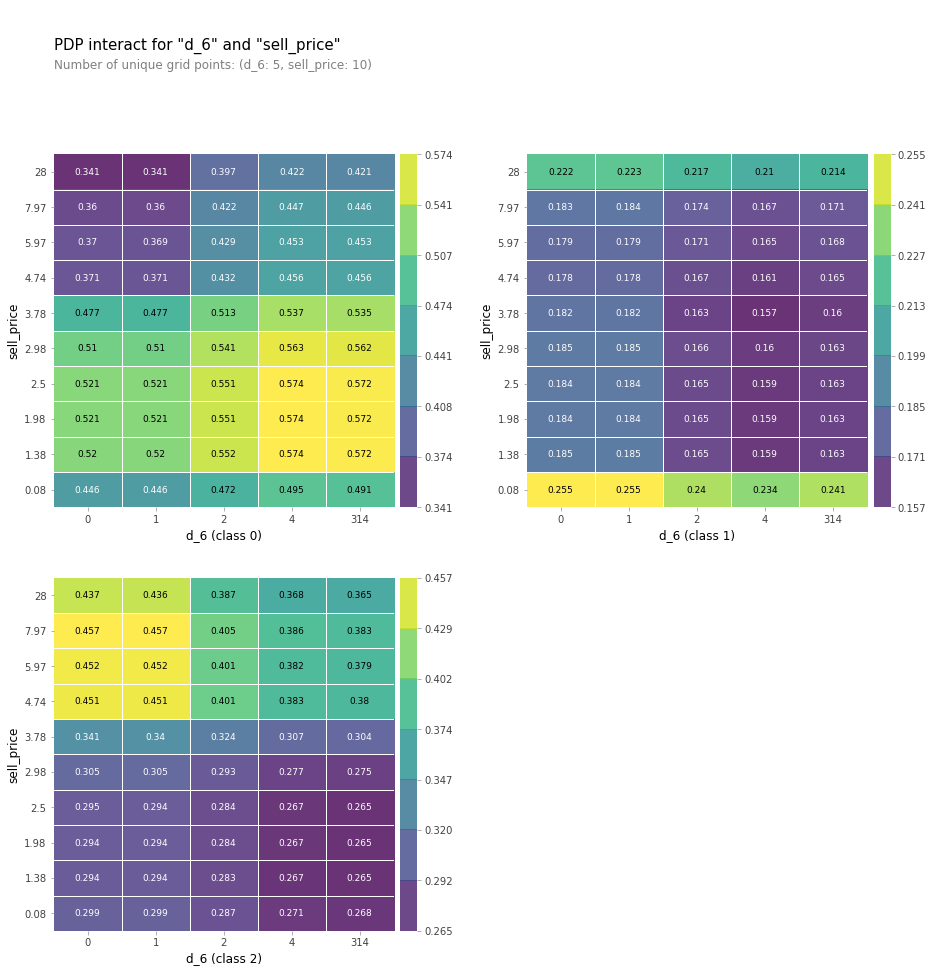

In [109]:
pdp_interact_plot(interactions, feature_names=features, plot_type='grid');

In [118]:
interactions[1]

In [0]:
#3D with Plotly

pdp1=interactions[1].pdp.pivot_table(
    values='preds',
    columns=features[0],
    index=features[1]
)[::-1]   # Since notation to reverse index order so y-axis is ascending

In [122]:
pdp1

d_6,0.0,1.0,2.0,4.0,314.0
sell_price,,,,,
28.00,0.222463,0.222665,0.216613,0.210423,0.213979
7.97,0.183232,0.183624,0.173545,0.167355,0.170911
5.97,0.178535,0.178927,0.170504,0.164514,0.168069
4.74,0.177774,0.178167,0.167014,0.161024,0.164580
3.78,0.182058,0.182277,0.162726,0.156736,0.160471
2.98,0.184833,0.184867,0.165775,0.159876,0.163314
2.50,0.184284,0.184318,0.165127,0.159228,0.162716
1.98,0.184284,0.184318,0.165127,0.159228,0.162716
1.38,0.185426,0.185461,0.165247,0.159348,0.162836


In [126]:
import plotly.graph_objs as go

surface = go.Surface(
    x=pdp1.columns,
    y=pdp1.index,
    z=pdp1.values
)

layout=go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]),
        yaxis=dict(title=features[1]),
        zaxis=dict(title=target)
                   
    )
)

fig=go.Figure(surface,layout)
fig.show()

In [0]:
import category_encoders as ce
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [25]:
%matplotlib inline

from pdpbox import pdp
train3=train.copy()
test3=test.copy()

wrangle(train3)
wrangle(test3)

target='store_id'
features=train3.columns.drop(target)

X=train3[features]
Y=train3[target]

encoder=ce.OrdinalEncoder()
X_encoded=encoder.fit_transform(X)

model=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

(<Figure size 1080x2700 with 11 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7f1ed8c68c88>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f1ed9cc5278>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


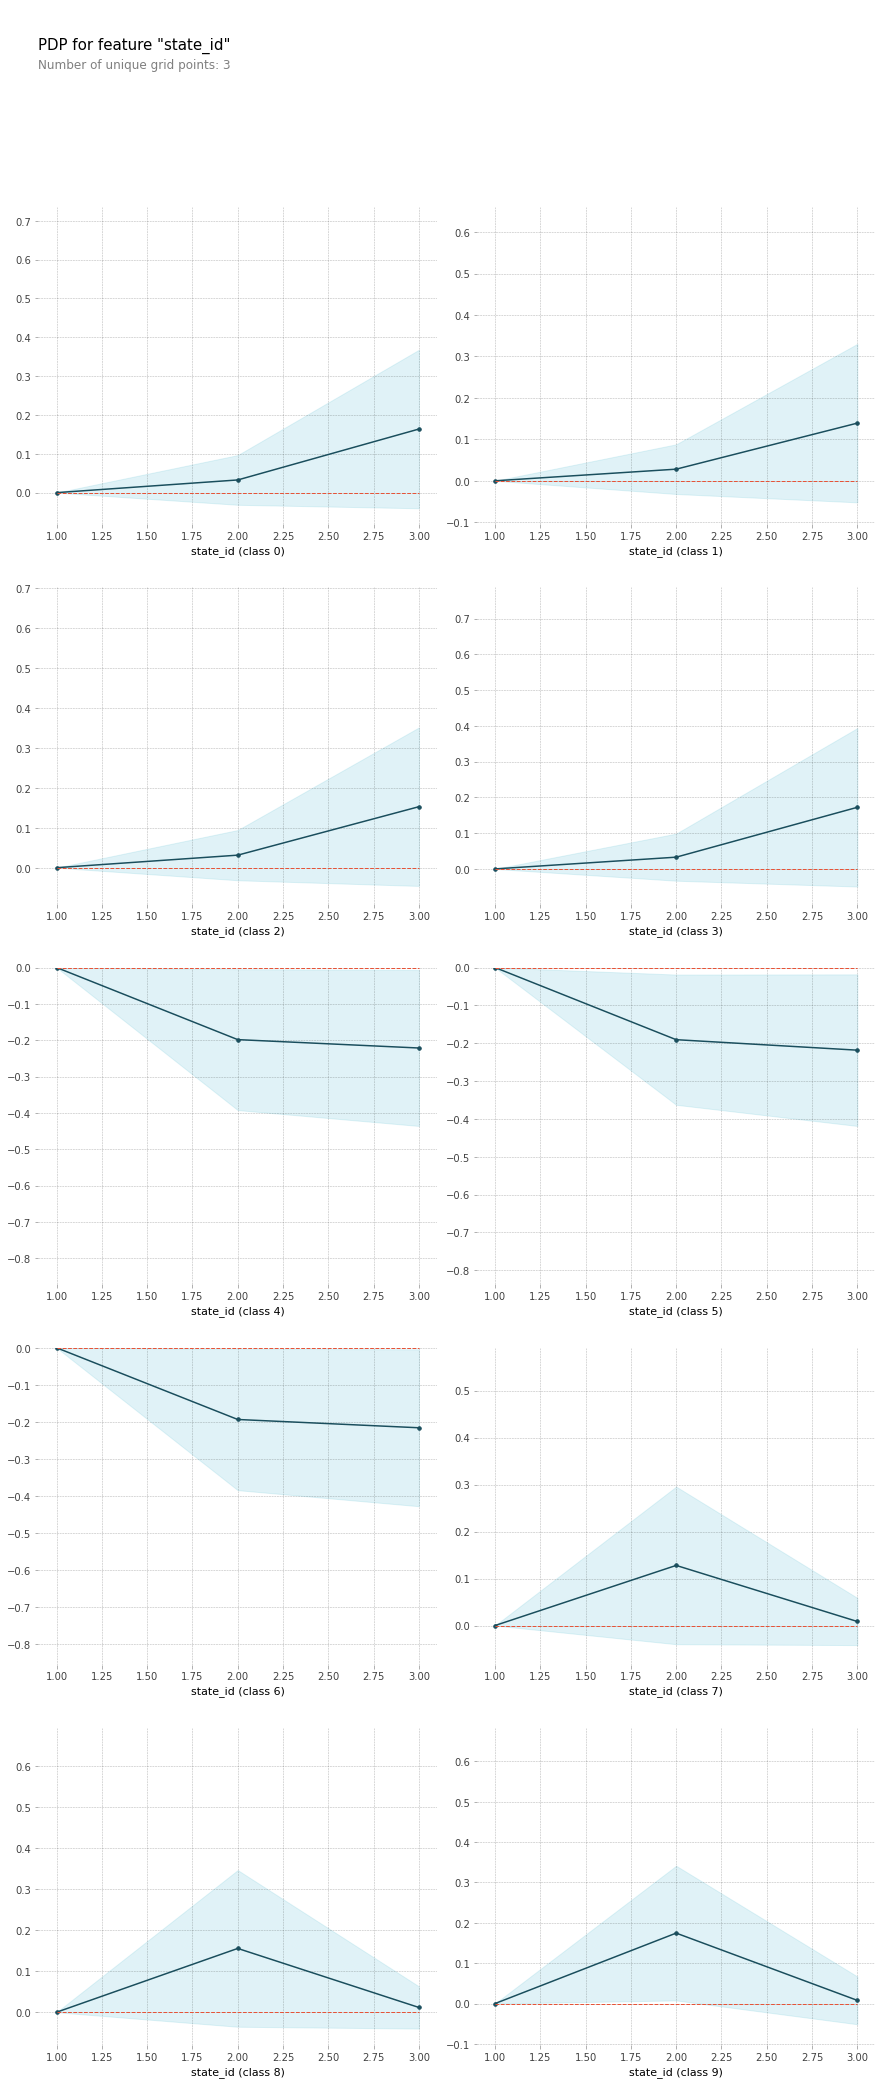

In [32]:
feature='state_id'

pdp_dist=pdp_isolate(model=model,
                     dataset=X_encoded, 
                     model_features=features, 
                     feature=feature)
pdp.pdp_plot(pdp_dist, feature)

In [33]:
encoder.mapping

[{'col': 'cat_id', 'data_type': dtype('O'), 'mapping': FOODS        1
  HOUSEHOLD    2
  HOBBIES      3
  NaN         -2
  dtype: int64},
 {'col': 'state_id', 'data_type': dtype('O'), 'mapping': TX     1
  WI     2
  CA     3
  NaN   -2
  dtype: int64},
 {'col': 'weekday', 'data_type': dtype('O'), 'mapping': Saturday     1
  Thursday     2
  Friday       3
  Wednesday    4
  Sunday       5
  Tuesday      6
  Monday       7
  NaN         -2
  dtype: int64},
 {'col': 'd', 'data_type': dtype('O'), 'mapping': d_1        1
  d_83       2
  d_106      3
  d_63       4
  d_89       5
          ... 
  d_107    120
  d_6      121
  d_71     122
  d_72     123
  NaN       -2
  Length: 124, dtype: int64},
 {'col': 'event_name_1',
  'data_type': dtype('O'),
  'mapping': Missing            1
  Cinco De Mayo      2
  MemorialDay        3
  Mother's day       4
  NBAFinalsStart     5
  SuperBowl          6
  Pesach End         7
  OrthodoxEaster     8
  Purim End          9
  PresidentsDay     10
  S

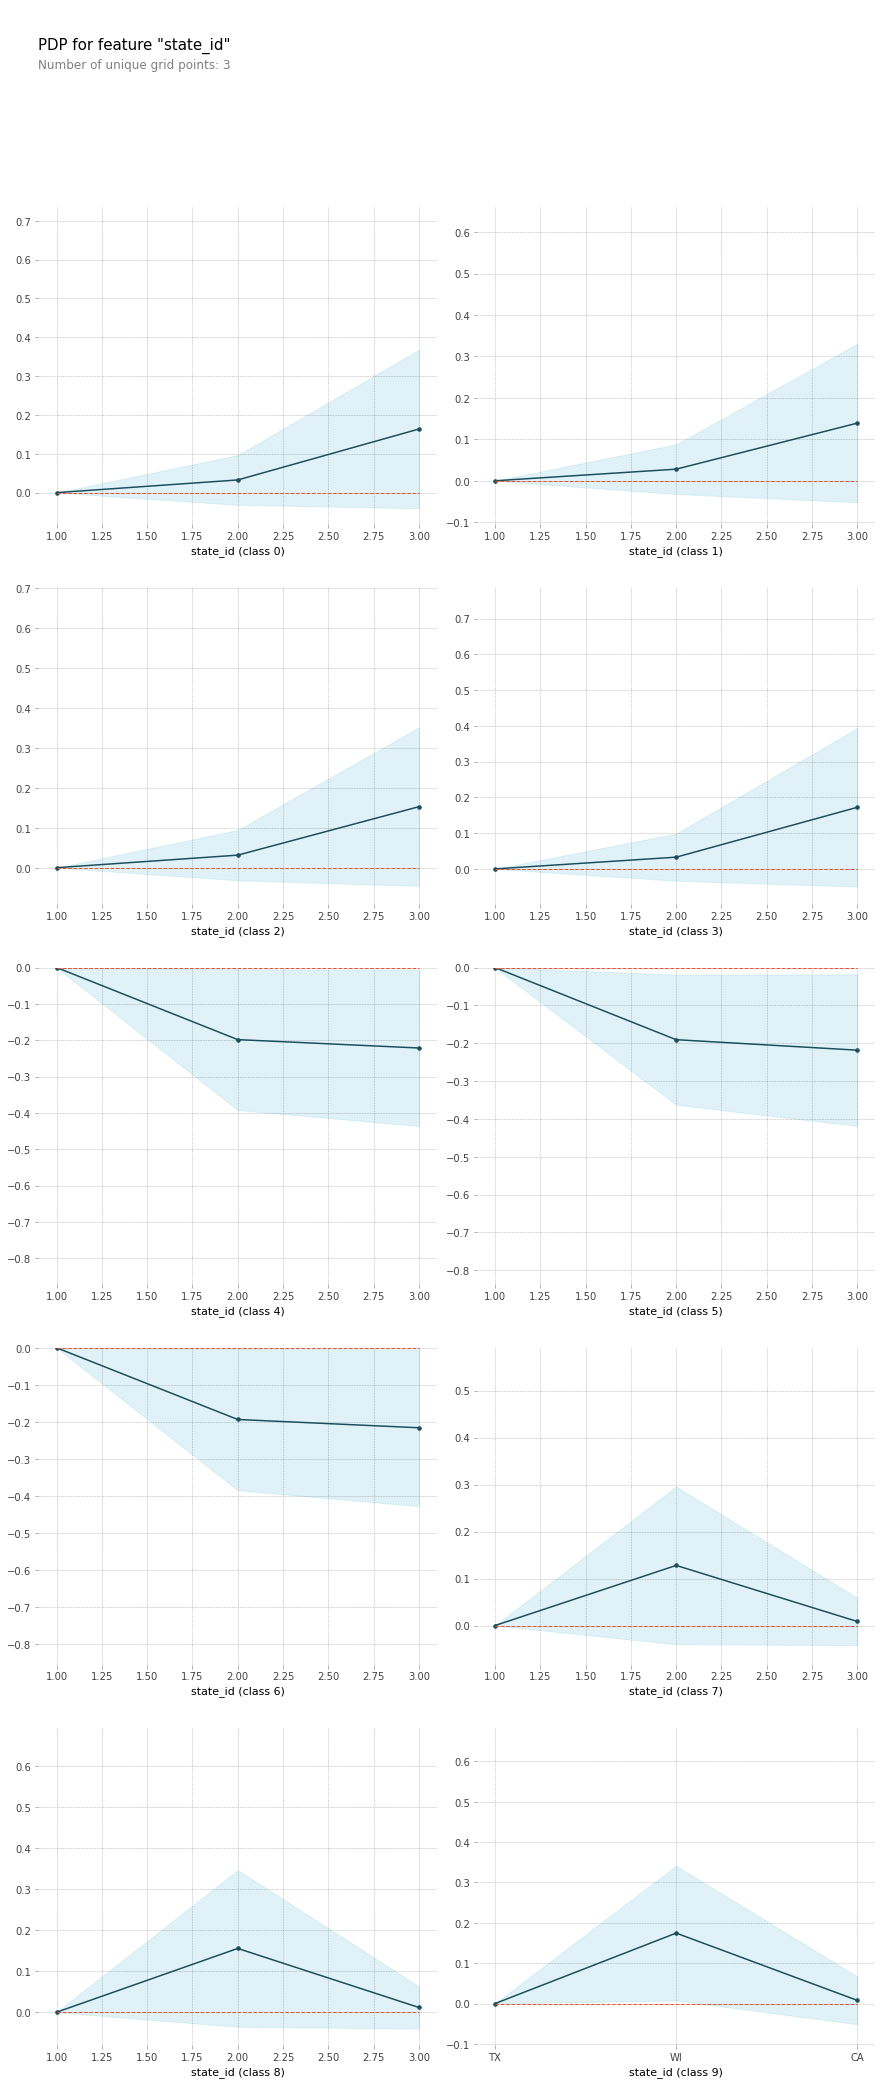

In [36]:
pdp.pdp_plot(pdp_dist,feature)
#manually changing the xticks labels
plt.xticks([1,2,3], ['TX', 'WI', 'CA' ]);

In [0]:
from pdpbox import pdp

In [0]:
# Automating the xticks re-assignment

feature= 'weekday'
for item in encoder.mapping:
  if item['col']==feature:
    feature_mapping=item['mapping']

feature_mapping=feature_mapping[feature_mapping.index.dropna()]
category_names=feature_mapping.index.tolist()
category_codes=feature_mapping.values.tolist()

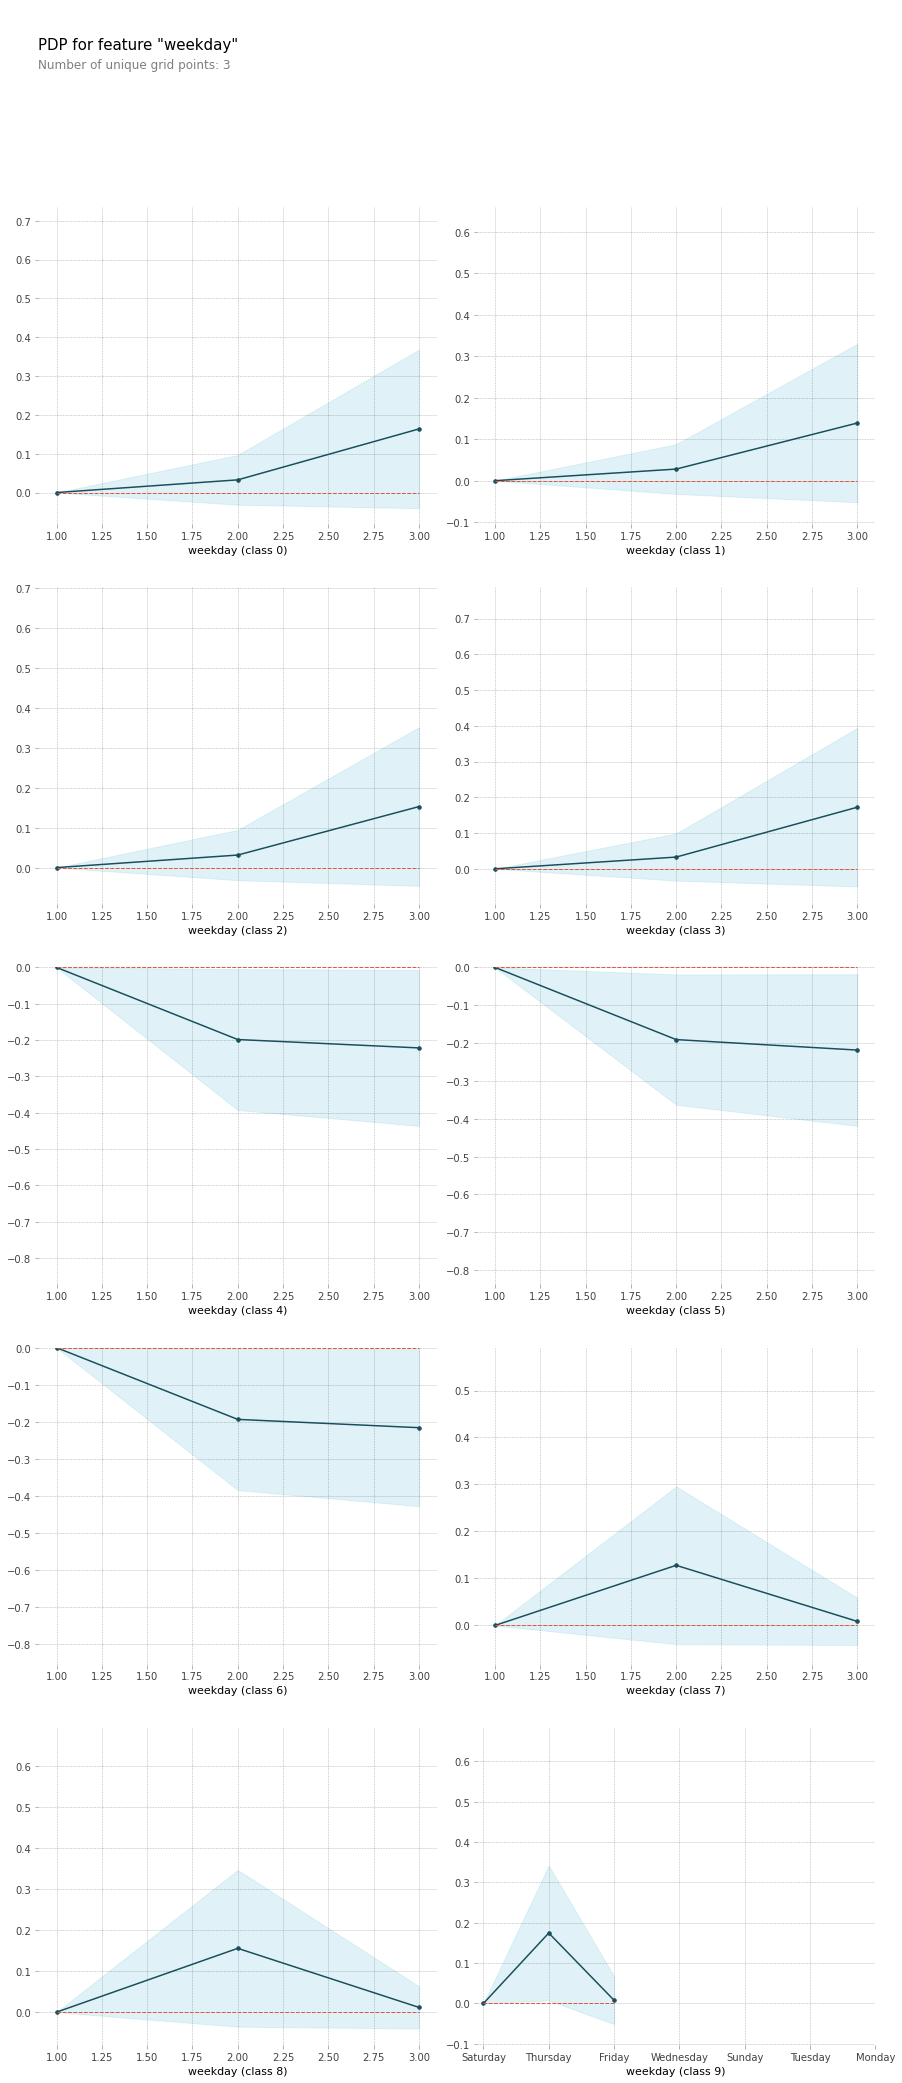

In [50]:
pdp.pdp_plot(pdp_dist,feature)
plt.xticks(category_codes, category_names);


###With multiple features

(<Figure size 1080x2844 with 21 Axes>,
 {'pdp_inter_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7f1ed8d5de80>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f1ed7fcbba8>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


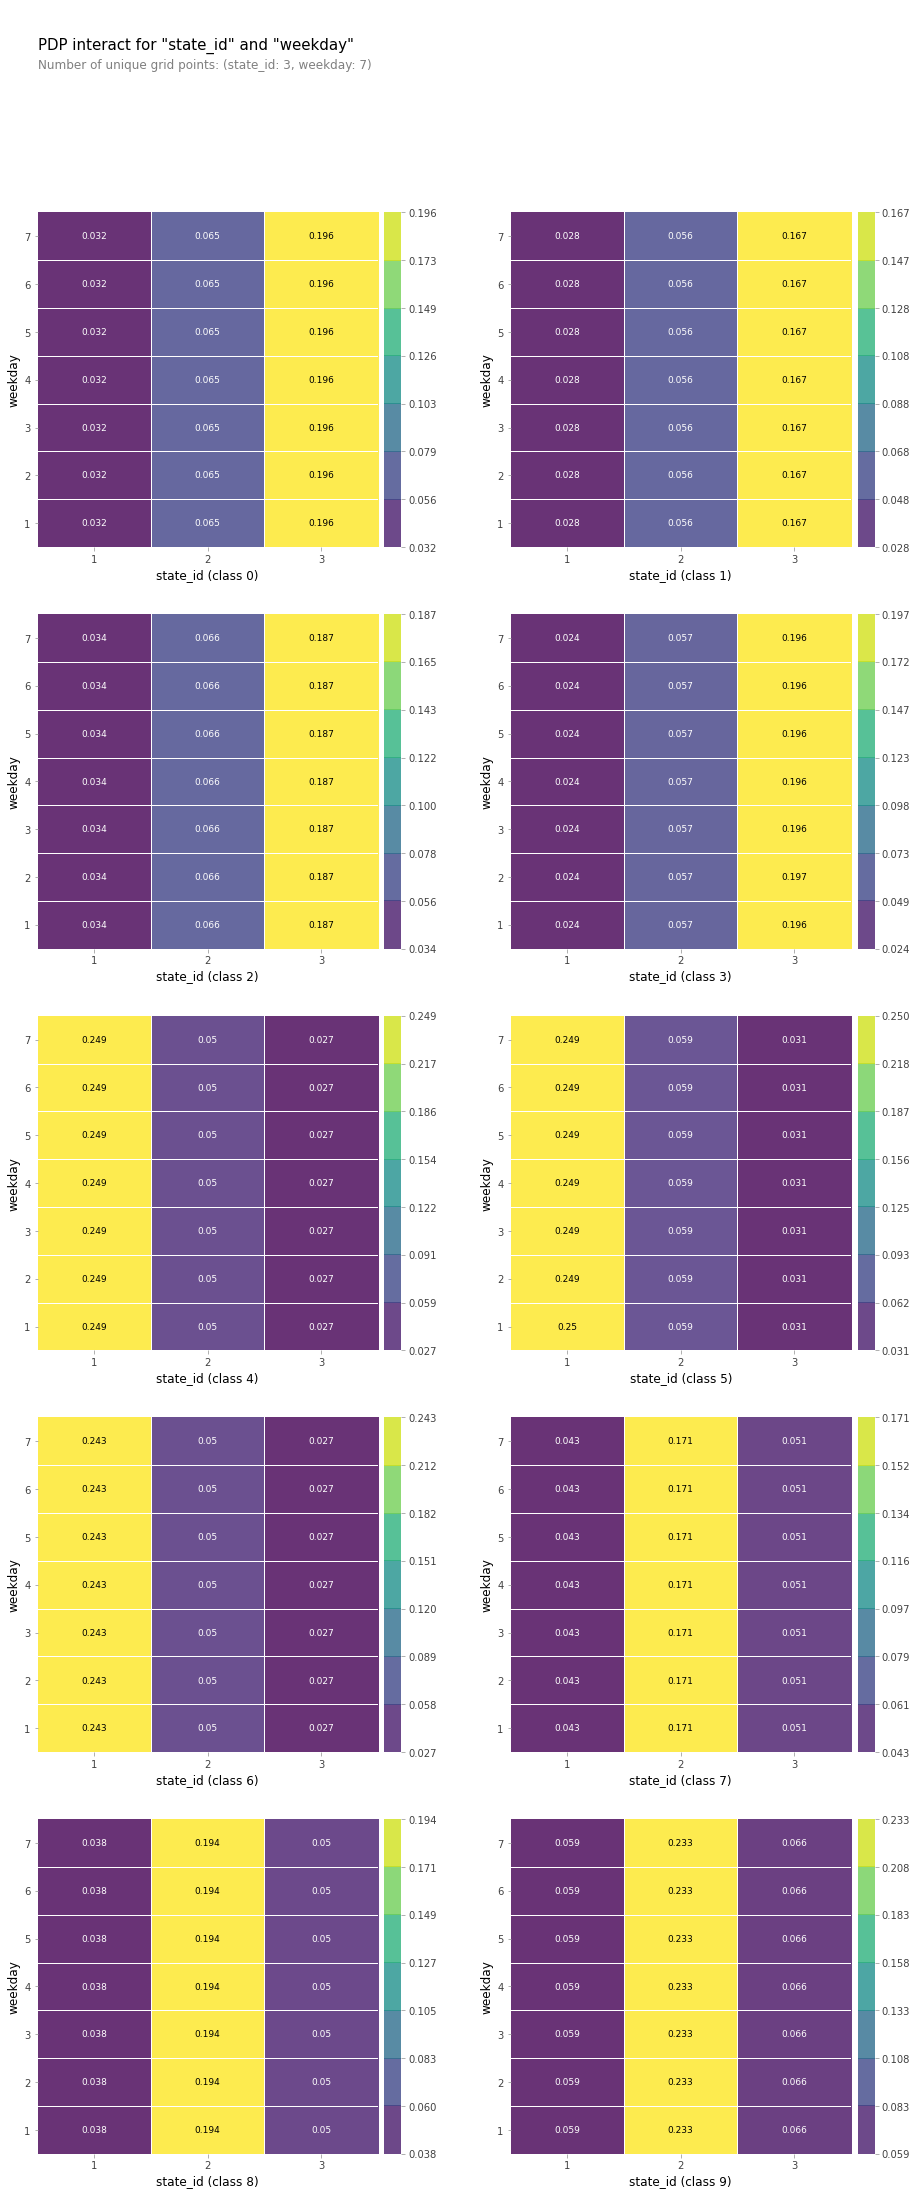

In [51]:
features=['state_id', 'weekday']

interaction=pdp_interact(
    model=model,
    dataset=X_encoded,
    model_features=X_encoded.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features)


Text(0.5, 1.0, 'Partial Dependence on Walmart categories on state_id and Weekday')

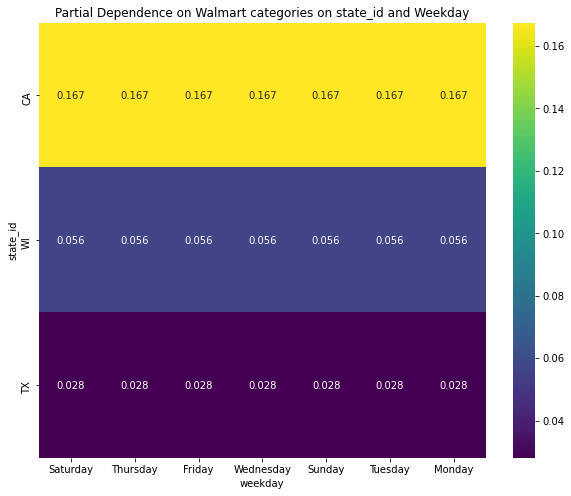

In [60]:
pdp3=interaction[1].pdp.pivot_table(
    values='preds',
    columns=features[1],   #1st feature on the x axis
    index=features[0]       #next feature on y - axis
)[::-1]                    # Reverse the index order so y axis is ascending

pdp3=pdp3.rename(columns=dict(zip(category_codes,category_names)))
pdp3=pdp3.rename(index=dict(zip([1,2,3], ['TX', 'WI', 'CA' ])))
plt.figure(figsize=(10,8))
sns.heatmap(pdp3, annot=True, fmt='.3f', cmap='viridis')
plt.title('Partial Dependence on Walmart categories on state_id and Weekday')

#SHAP

In [0]:
# Arranging X features and y target vectors
train4=train.copy()
test4=test.copy()

features=[ 'state_id', 'weekday', 'cat_id']
target='sell_price'

X_train=train4[features]
y_train=train4[target]
X_test=test4[features]
y_test=test4[target]

encoder=ce.OrdinalEncoder()
X_encoded=encoder.fit_transform(X)

model=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, Y)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions={
    'n_estimators': [20, 50, 100],
    'max_depth':[5, 10, 15, None]
}

search=RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter= 3,
    cv=2,
    scoring='neg_mean_absolute_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train,y_train);